#**HEART DISEASE ANALYSIS**


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split

**Read data from csv file**

In [ ]:
dataframe=pd.read_csv("/content/heart.csv")

**Getting first 10 rows in the dataset**

In [ ]:
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**Description about the dataset**

1.age

2.sex

3.chest pain type (4 values)

value 0: typical angina

value 1: atypical angina

value 2: non-anginal pain

value 3: asymptomatic

4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5.chol: serum cholestrol in mg/dl

6.fbs: (fasting blood sugar> 120 mg/dl)(1 = true; 0 = false)

7.restecg: resting electrocardiographic results

value 0: normal

value 1: having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of> 0.05 mV)

value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8.thalach: maximum heart rate achieved

9.exang: exercise induced angina (1=yes; 0=no)

10.oldpeak = ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment

value 1: upsloping

value 2: flat

value 3: downloping

12.ca: number of major vessels (0-3) colored by flourosopy

13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target: 0=less chance of heart attack, 1 = more chance of heart attack

#**Data Analysis**

In [ ]:
# Getting info about the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Checking for null values
dataframe.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

#**Data Visualization**

**Number of patients having heart disease and not having heart disease**

<ipython-input-60-e0beef158dcc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= dataframe['target'],palette='Accent_r',saturation=1,edgecolor='black')


<Axes: xlabel='target', ylabel='count'>

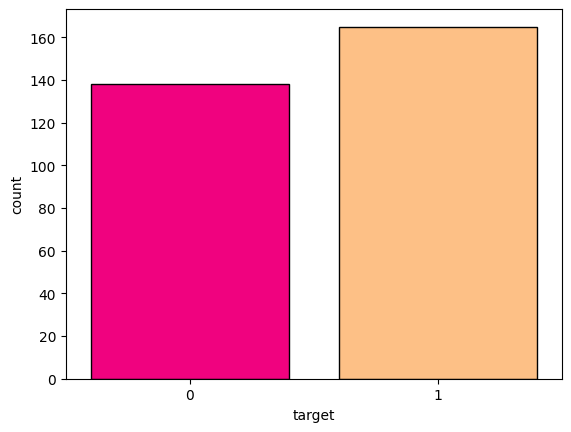

In [ ]:
sns.countplot(x= dataframe['target'],palette='Accent_r',saturation=1,edgecolor='black')

**NOTE**

0 - No heart disease

1 - Have heart disease

From the above graph, it is confirmed that half of the people have heart disease

#**Correlation Matrix**

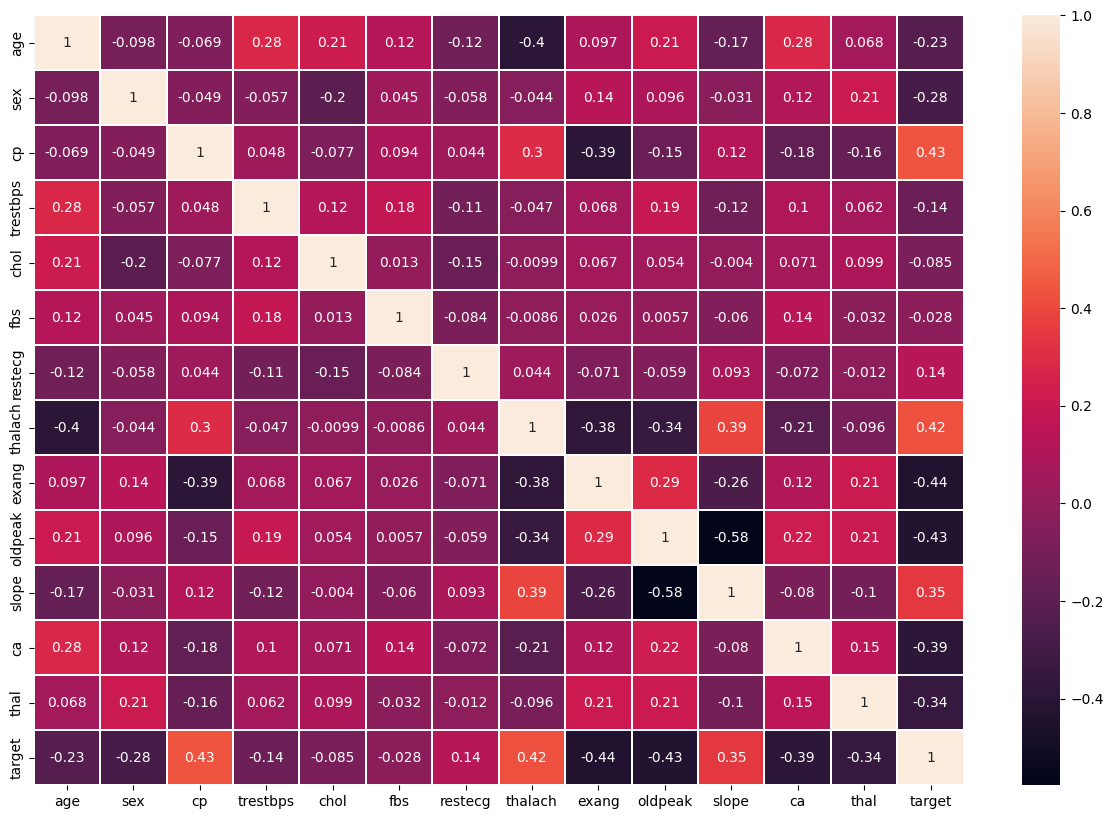

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True)
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

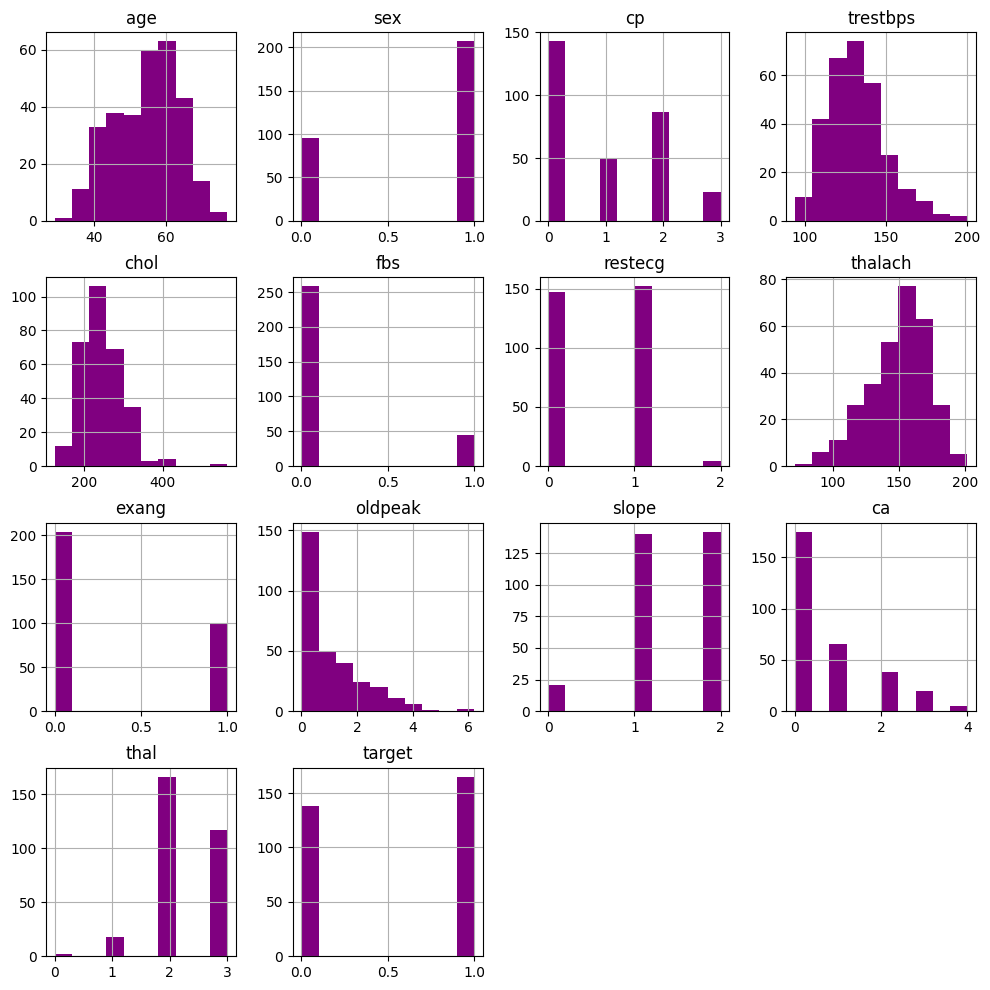

In [ ]:
# Plotting histogram
dataframe.hist(figsize=(12,12),color='purple')

 **Splitting data into train and test**

In [ ]:
# Defining X and y variables(Independent and dependent)
X=dataframe.drop(columns=['target'])
y=dataframe['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

#**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.881578947368421
Testing Sensitivity for Logistic Regression: 0.9032258064516129
Testing Specificity for Logistic Regression: 0.8666666666666667
Testing Precision for Logistic Regression: 0.8235294117647058


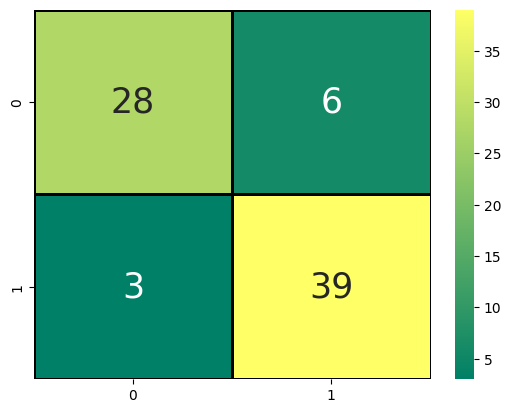

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='summer',linewidths=1, linecolor='black',annot_kws={"size": 25})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.87      0.93      0.90        42

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



**NOTE**- From the above report, we get the **accuracy** of the Logistic Regression classifier is about **88%**.

#**Decision Tree**

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.95      1.00      0.98        42

    accuracy                           0.97        76
   macro avg       0.98      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76

Testing Accuracy for Decision Tree: 0.9736842105263158
Testing Sensitivity for Decision Tree: 1.0
Testing Specificity for Decision Tree: 0.9545454545454546
Testing Precision for Decision Tree: 0.9411764705882353


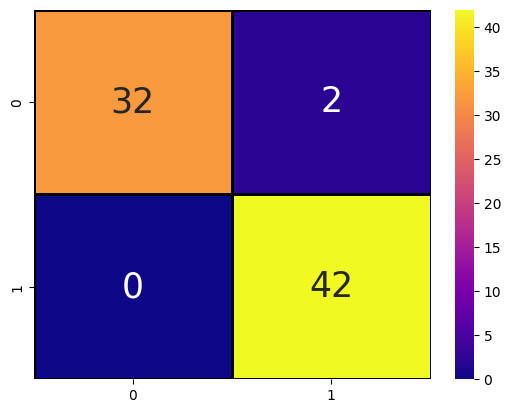

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='plasma',linewidths=1, linecolor='black',annot_kws={"size": 25})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

**NOTE**- From the above report, we get the **accuracy** of the Decision Tree classifier is about **97%**.

#**Random Forest Classifier**

85.53
Testing Accuracy for Random Forest: 0.8552631578947368
Testing Sensitivity for Random Forest: 0.8484848484848485
Testing Specificity for Random Forest: 0.8604651162790697
Testing Precision for Random Forest: 0.8235294117647058


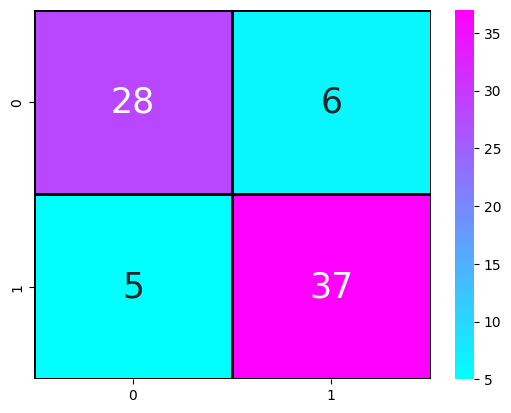

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='cool',linewidths=1, linecolor='black',annot_kws={"size": 25})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        34
           1       0.86      0.88      0.87        42

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



**NOTE**- From the above report, we can get the **accuracy** of the Random Forest classifier is about **86%**.

#**Support Vector Machines**

Testing Accuracy for SVM: 0.868421052631579
Testing Sensitivity for Random Forest: 0.8529411764705882
Testing Specificity for Random Forest: 0.8809523809523809
Testing Precision for Random Forest: 0.8529411764705882


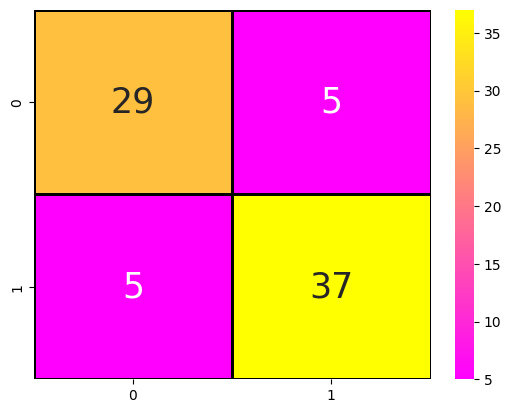

In [ ]:
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='spring',linewidths=1, linecolor='black',annot_kws={"size": 25})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.88      0.88      0.88        42

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



**NOTE** - From the above report, we get the **accuracy** of the Support Vector Machine classifier is about **87%**

**INFERENCE**

  From the results that we got, as four machine learning algorithms like Logistic Regression, Random Forest, Support Vector Machines and Decision Trees.

  From the final results, we got **Logistic Regression as 88%, Random Forest as 86%, Support Vector Machines as 87%, and Decision Trees as 97%**.
  
  We can conclude that the **Decision Tree algorithm is the best algorithm for our model with the highest accuracy around 97 percent**.